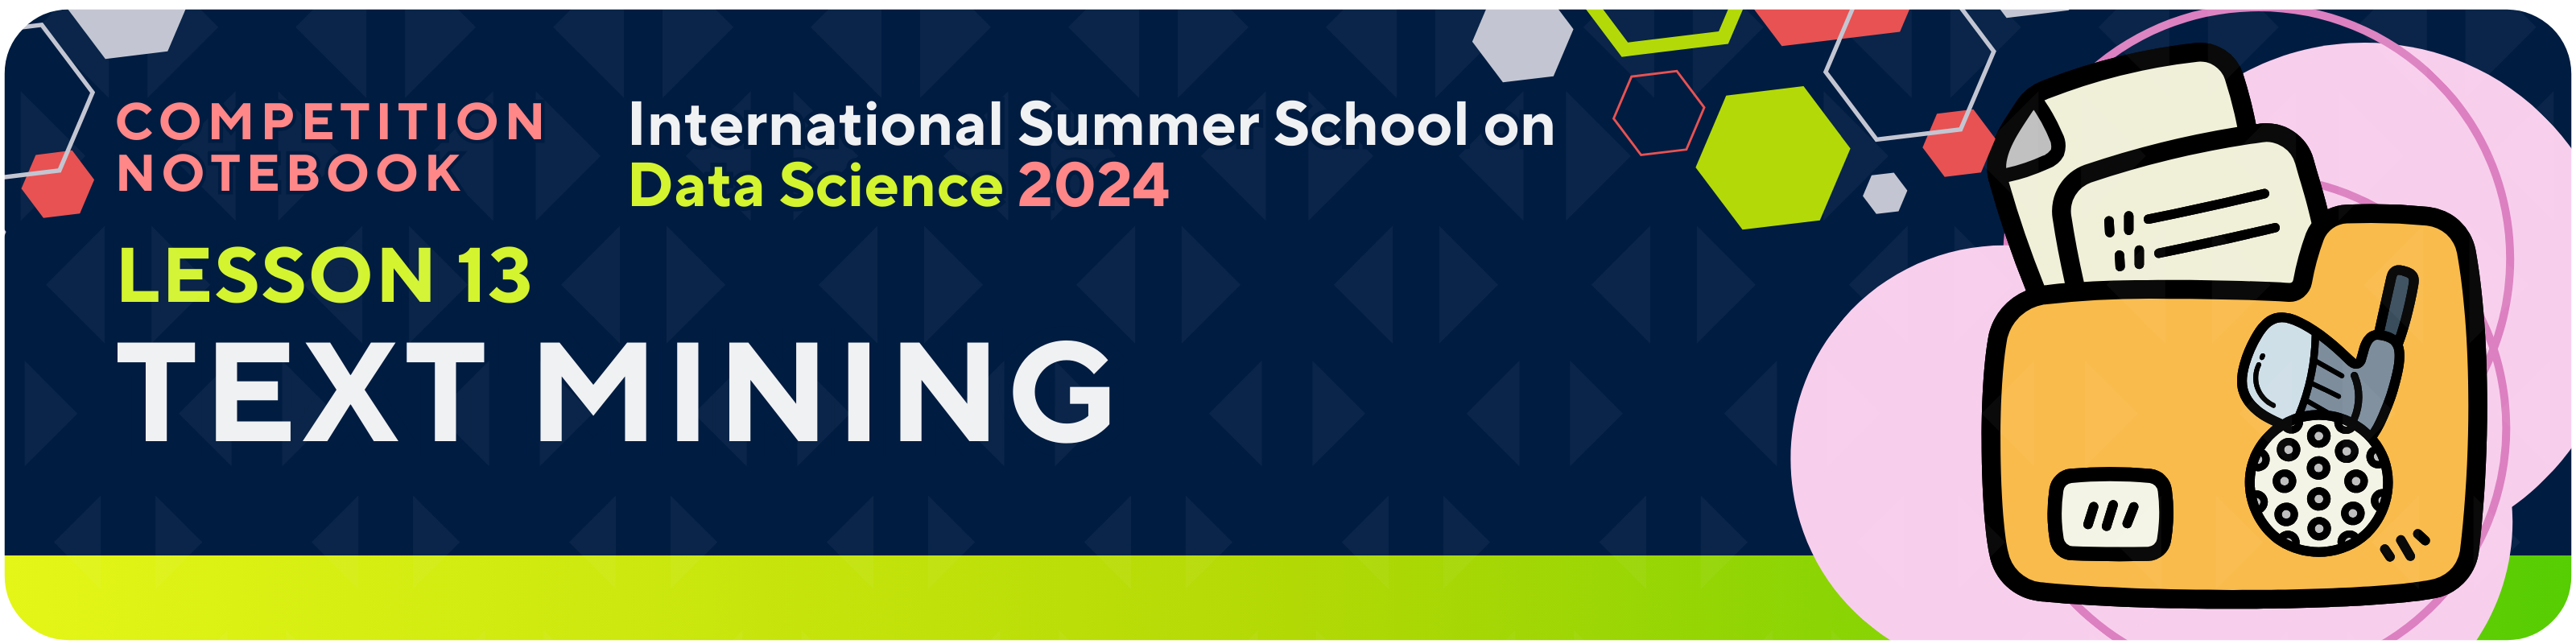

## **🎯      Goal**

Your goal is to **classify the news topic** based on the contents of the news by the following four Class Index:<br><br>


<img src="https://i.imgur.com/OfjKcg0.png" width=800 />

## **1**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np

# Model Validation
from sklearn.metrics         import accuracy_score
from sklearn.pipeline        import Pipeline
from sklearn.base            import BaseEstimator, TransformerMixin

# Classification
from sklearn.linear_model import LogisticRegression

# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

# Count Vectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Natural Language Processing
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import gensim.downloader as api

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

## **2**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Load the Training Set**


In [ ]:
# Load the train dataset
train_url = "https://www.dropbox.com/scl/fi/7vakczoogqxkkcmz44jsv/train.csv?rlkey=9t9ph02ep55r08vrtrrj5rg1e&st=kmhrv0c6&dl=0&raw=1"
df_train = pd.read_csv(train_url, index_col='Title').drop_duplicates()

print(df_train)

                                                    Class Index  \
Title                                                             
Wall St. Bears Claw Back Into the Black (Reuters)             3   
Carlyle Looks Toward Commercial Aerospace (Reut...            3   
Oil and Economy Cloud Stocks' Outlook (Reuters)               3   
Iraq Halts Oil Exports from Main Southern Pipel...            3   
Oil prices soar to all-time record, posing new ...            3   
...                                                         ...   
Pakistan's Musharraf Says Won't Quit as Army Chief            1   
Renteria signing a top-shelf deal                             2   
Saban not going to Dolphins yet                               2   
Today's NFL games                                             2   
Nets get Carter from Raptors                                  2   

                                                                                          Description  
Title                   


## **3**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Set Feature Matrix & Target Variable**



In [ ]:
target_col = 'Class Index'
X_train, y_train = df_train['Description'], df_train[target_col]

## **4**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Explore the Data**

In [ ]:
# Basic dataset information
print("\nClass distribution:\n", df_train['Class Index'].value_counts(normalize=True))


Class distribution:
 Class Index
2    0.251109
1    0.250612
3    0.249501
4    0.248778
Name: proportion, dtype: float64


## **5**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Perform Preprocessing**


In [ ]:
# Initialize stopwords and lemmatizer outside the function
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove numbers and punctuation
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatize
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join tokens back into a string
    processed_text = ' '.join(tokens)

    return processed_text


## **6**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Make Prediction Model**



#### (Optional) Word Embedding Method

In [ ]:
# # Options for pre-trained word vectors (uncomment one):

# # model_name = "word2vec-google-news-300"  # Word2Vec
# # model_name = "glove-twitter-200"  # GloVe Twitter
# # model_name = "glove-wiki-gigaword-100"  # GloVe Wikipedia
# model_name = "glove-wiki-gigaword-50"  # GloVe Wikipedia
# # model_name = "fasttext-wiki-news-subwords-300"  # FastText

# # Load word vectors
# word_vectors = api.load(model_name)

# class Doc2VecTransformer(BaseEstimator, TransformerMixin):
#     def __init__(self, word_vectors):
#         self.word_vectors = word_vectors

#     def fit(self, X, y=None):
#         return self

#     def transform(self, X):
#         return np.array([
#             np.mean([self.word_vectors[word] for word in preprocess_text(doc).split()
#                      if word in self.word_vectors] or
#                     [np.zeros(self.word_vectors.vector_size)], axis=0)
#             for doc in X
#         ])

In [ ]:
# Create the pipeline
model = Pipeline([
    ('vectorizer', CountVectorizer(preprocessor=preprocess_text, max_features=500)),
    #('vectorizer', TfidfVectorizer(preprocessor=preprocess_text)),
    #('vectorizer', Doc2VecTransformer(word_vectors)),
    ('classifier', LogisticRegression())
])


## **7**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Tune Hyperparameters**



In [ ]:
# # Define the parameter grid for RandomizedSearchCV
# param_dist = {
#     'vectorizer__max_features': [1000, 2000, 3000],
#     'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)],
#     'classifier__C': [0.01, 0.1, 0.5, 1.0]
# }

# # Create and run RandomizedSearchCV
# random_search = RandomizedSearchCV(model, param_distributions=param_dist,
#                                    n_iter=10, cv=3, scoring='accuracy', verbose=3)
# random_search.fit(X_train, y_train)

# model = random_search.best_estimator_

# # Print best parameter and score
# print("Best Parameters:")
# print(pd.Series(random_search.best_params_))
# print("\nBest Accuracy:")
# print(f"{random_search.best_score_:.4}")


## **8**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Fit the Model**



In [ ]:
# Fit the model
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vectorizer',
                 CountVectorizer(max_features=500,
                                 preprocessor=<function preprocess_text at 0x78a24076e4d0>)),
                ('classifier', LogisticRegression())])


## **9**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Make Prediction**



In [ ]:
# Load the test dataset
test_url = "https://www.dropbox.com/scl/fi/7abd5xww06q9fwbej7txg/test.csv?rlkey=7urpgw6tv7doofx5hmnmuwl03&st=yo2lpytk&dl=0&raw=1"
df_test = pd.read_csv(test_url, index_col='Title')

X_test = df_test['Description']

# Make predictions using the model
y_pred = model.predict(X_test)


## **10**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Create Submission File**


In [ ]:
# Make DataFrame for Submission
submission = pd.DataFrame(y_pred, index=df_test.index, columns=[target_col])

# Make a CSV file for Submission
submission.to_csv('submission.csv')

submission

,Class Index
Title,
Fears for T N pension after talks,3
The Race is On: Second Private Team Sets Launch Date for Human Spaceflight (SPACE.com),4
Ky. Company Wins Grant to Study Peptides (AP),4
Prediction Unit Helps Forecast Wildfires (AP),2
Calif. Aims to Limit Farm-Related Smog (AP),1
...,...
Powell pushes diplomacy for N. Korea,1
Void is filled with Clement,2
Martinez leaves bitter,2


## <font color="#B8D71D">▝</font><font color="#707DA0">▖   </font>**Download File**

In [ ]:
from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>